In [238]:
import pandas as pd
import seaborn as sns

In [239]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
submission = pd.read_csv('sample_submission.csv')

In [240]:
train.head(3)

,A,B,C,D,E,F,G,H,Target
0,F,0.615,0.455,0.135,1.059,0.4735,0.2630,0.274,9
1,F,0.515,0.395,0.140,0.686,0.2810,0.1255,0.220,12
2,M,0.660,0.530,0.175,1.583,0.7395,0.3505,0.405,10


In [241]:
def draw_boxplot(df, col):
    sns.boxplot(df[col])

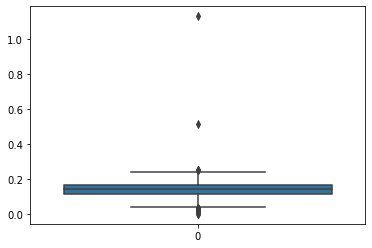

In [242]:
draw_boxplot(train, 'D')

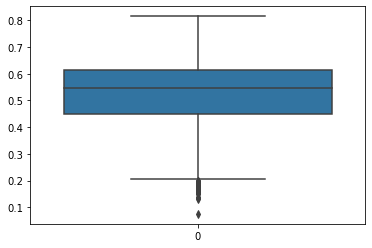

In [243]:
draw_boxplot(train, 'B')

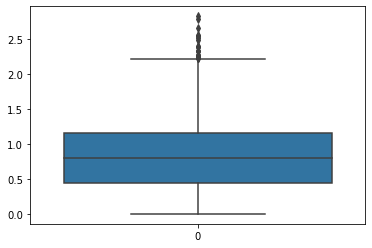

In [244]:
draw_boxplot(train, 'E')

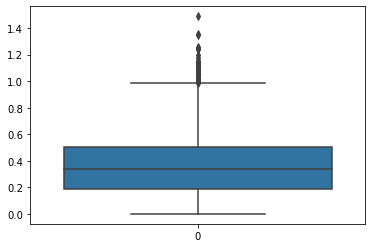

In [245]:
draw_boxplot(train, 'F')

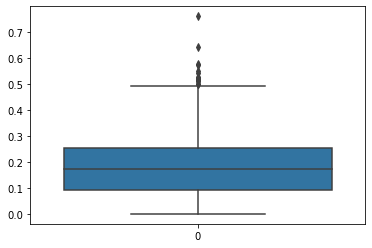

In [246]:
draw_boxplot(train, 'G')

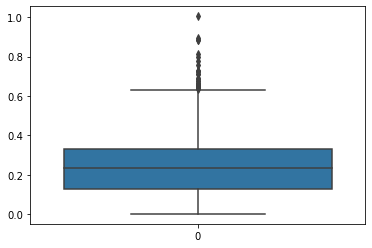

In [247]:
draw_boxplot(train, 'H')

In [248]:
def outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    
    lower_limit = q1 - 1.5*iqr
    upper_limit = q3 + 1.5*iqr
    
    lst = df.index[(df[col] < lower_limit) | (df[col] > upper_limit)]
    return lst

In [249]:
outlier_indices = []
sum = 0
for col in ['B','C','D','E','F','G','H']:
    print(outliers(train,col))

Int64Index([  84,  218,  359,  648,  678,  880, 1001, 1038, 1081, 1175, 1176,
            1220, 1224, 1272, 1377, 1407, 1492, 1503, 1605, 1618, 1658, 1850,
            1905, 2047, 2087, 2121, 2213, 2264, 2266, 2378, 2526, 2865],
           dtype='int64')
Int64Index([  84,  218,  359,  645,  648,  678,  685,  880, 1001, 1038, 1075,
            1081, 1175, 1176, 1220, 1224, 1272, 1377, 1407, 1440, 1492, 1503,
            1605, 1618, 1658, 1660, 1850, 1894, 1905, 2047, 2060, 2087, 2121,
            2213, 2264, 2266, 2378, 2526, 2865],
           dtype='int64')
Int64Index([  16,   73,  648,  880, 1001, 1038, 1175, 1176, 1220, 1224, 1268,
            1407, 1492, 1653, 1658, 1777, 2125, 2266, 2526, 2943],
           dtype='int64')
Int64Index([  55,  129,  545,  560,  653, 1058, 1067, 1193, 1264, 1268, 1385,
            1497, 1601, 1603, 2125, 2150, 2174, 2425, 2566, 2822, 2870, 2975,
            3063],
           dtype='int64')
Int64Index([  73,  129,  486,  545,  560,  642,  796, 1058, 1067

In [250]:
outlier_indices = []
for col in ['B','C','D','E','F','G','H']:
    outlier_indices.extend(outliers(train, col))

In [251]:
len(outlier_indices)

194

In [252]:
len(list(set(outlier_indices))) ## unique values

109

In [253]:
outlier_indices = list(set(outlier_indices))
print(len(outlier_indices))

109


## It's ok to remove 109 rows out of 3132 rows

In [254]:
## removing outliers

for index in outlier_indices:
    train.drop(index,inplace = True)

In [255]:
train  ### 109 rows are removed

,A,B,C,D,E,F,G,H,Target
0,F,0.615,0.455,0.135,1.0590,0.4735,0.2630,0.274,9
1,F,0.515,0.395,0.140,0.6860,0.2810,0.1255,0.220,12
2,M,0.660,0.530,0.175,1.5830,0.7395,0.3505,0.405,10
3,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
4,M,0.495,0.400,0.155,0.8085,0.2345,0.1155,0.350,6
...,...,...,...,...,...,...,...,...,...
3127,F,0.490,0.400,0.115,0.5690,0.2560,0.1325,0.145,9
3128,F,0.670,0.550,0.190,1.3905,0.5425,0.3035,0.400,12
3129,M,0.510,0.395,0.125,0.5805,0.2440,0.1335,0.188,11
3130,M,0.575,0.465,0.120,1.0535,0.5160,0.2185,0.235,9


In [256]:
train['A'].value_counts() 
### I assume this is a balanced data

M    1100
F     965
I     958
Name: A, dtype: int64

## Column A is categorical. Applying encoding on column A

In [257]:

train = pd.get_dummies(train, prefix='gender')
train.head(2)

,B,C,D,E,F,G,H,Target,gender_F,gender_I,gender_M
0,0.615,0.455,0.135,1.059,0.4735,0.2630,0.274,9,1,0,0
1,0.515,0.395,0.140,0.686,0.2810,0.1255,0.220,12,1,0,0


In [258]:
test = pd.get_dummies(test, prefix='gender')
test.head(2)

,Index,B,C,D,E,F,G,H,gender_F,gender_I,gender_M
0,866,0.605,0.455,0.16,1.1035,0.421,0.3015,0.325,0,0,1
1,1483,0.590,0.440,0.15,0.8725,0.387,0.2150,0.245,0,0,1


## Splitting data into training and validation 

In [259]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = train.drop('Target',axis= 1)
Y = train['Target']

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.1, random_state=42)

In [260]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

## Logistic Regression


In [261]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
logistic =  LogisticRegression(max_iter=1000, solver='liblinear')
logistic.fit(X_train_scaled,Y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [262]:
### helper funtion to evaluate all models

def scores(model, X_train, Y_train, X_val, Y_val):
    Y_pred = model.predict(X_val)
    mse =  mean_squared_error(Y_val, Y_pred)
    train_accu = model.score(X_train, Y_train)
    val_accu = model.score(X_val, Y_val)
    return mse, train_accu, val_accu

In [263]:
e, t_acc, val_acc = scores(logistic, X_train_scaled, Y_train, X_val_scaled, Y_val)

In [264]:
print(e, t_acc, val_acc)

6.481848184818482 0.26544117647058824 0.24092409240924093


## Linear Regression


In [265]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train_scaled, Y_train)

LinearRegression()

In [266]:
e, t_acc, val_acc = scores(linear, X_train_scaled, Y_train, X_val_scaled, Y_val)
print(e, t_acc, val_acc)

4.492737784515564 0.5237939129158949 0.549378415919491


## Decision Tree Regression

In [267]:
from sklearn.tree import DecisionTreeRegressor
decision = DecisionTreeRegressor()
decision.fit(X_train_scaled, Y_train)

DecisionTreeRegressor()

In [268]:
e, t_acc, val_acc = scores(logistic, X_train_scaled, Y_train, X_val_scaled, Y_val)
print(e, t_acc, val_acc)

6.481848184818482 0.26544117647058824 0.24092409240924093


## Random Forest Regression

In [269]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train_scaled, Y_train)

RandomForestRegressor()

In [270]:
e, t_acc, val_acc = scores(forest, X_train_scaled, Y_train, X_val_scaled, Y_val)
print(e, t_acc, val_acc)


4.114370627062707 0.932855328660923 0.5873286404892586


#### Here the train accuracy very large compared to validation accuracy, Hence the random forest regression model here is overfitted. This can be ovecome by tuning the hyperparameters.

## SVM


In [271]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(X_train_scaled, Y_train)

SVR()

In [272]:
e, t_acc, val_acc = scores(logistic, X_train_scaled, Y_train, X_val_scaled, Y_val)
print(e, t_acc, val_acc)

6.481848184818482 0.26544117647058824 0.24092409240924093


- Any other model expect the random regressor is givning training accuracy around 25% and validation accuary around 40%

In [273]:
X_test = test.drop('Index', axis=1)  
X_test_scaled = scaler.transform(X_test)

## After experimenting with the values I came up with the following hyperparameters


In [274]:
best_rf = RandomForestRegressor(bootstrap = True,
 max_depth= 12,
 max_features = 'sqrt',
 min_samples_leaf= 3,
 min_samples_split= 10,
 n_estimators = 300)

In [275]:
best_rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=12, max_features='sqrt', min_samples_leaf=3,
                      min_samples_split=10, n_estimators=280)

In [276]:
e, t_acc, val_acc = scores(best_rf, X_train, Y_train, X_val, Y_val)
print(e, t_acc, val_acc)

4.316204805382291 0.7458235409987679 0.5670846731094072


##  Predicting and Saving 

In [277]:

predictions = best_rf.predict(X_test)
target_df = pd.DataFrame(predictions, columns=['Target'])
submission_df = pd.concat([test['Index'],target_df],axis = 1)
submission_df.to_csv('submission.csv', index=False) 

## Below are the codes that are used for hypertuning the parametes
- COURTESY : CHAT GPT

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Create a linear regression model
model = Ridge()

# Define the hyperparameter grid for tuning
param_grid = {'alpha': [0.07,0.05,0.1, 1.0, 10.0], 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_model.predict(X_val)
mse = mean_squared_error(Y_val, y_pred)

# Print the best hyperparameters and mean squared error
print("Best Hyperparameters:", best_params)
print("Mean Squared Error:", mse)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Create a logistic regression model
model = LogisticRegression()

# Define the hyperparameter grid for tuning
param_grid = {'C': [0.1, 1.0, 10.0], 'penalty': ['l1', 'l2']}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_model.predict(X_val)
accuracy = accuracy_score(Y_val, y_pred)

# Print the best hyperparameters and accuracy score
print("Best Hyperparameters:", best_params)
print("Accuracy Score:", accuracy)


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Create an SVM model
model = SVC()

# Define the hyperparameter grid for tuning
param_grid = {'C': [0.1, 1.0, 10.0],
              'kernel': ['linear', 'poly', 'rbf'],
              'gamma': ['scale', 'auto']}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(Y_val, Y_pred)

# Print the best hyperparameters and accuracy score
print("Best Hyperparameters:", best_params)
print("Accuracy Score:", accuracy)
